In [2]:
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

### Data preprocessing

In [4]:
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [6]:
pd.DataFrame(train_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [8]:
train_x.shape, test_x.shape

((404, 13), (102, 13))

In [10]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

### Create model

#### Ver. 1

In [18]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [19]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [16]:
model.fit(train_x, train_y, epochs=80, batch_size=1, validation_split=0.1, callbacks=[PlotLossesKeras()])

KeyboardInterrupt: 

In [ ]:
print(model.summary())

In [26]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set mae: {:4f}'.format(results[1]))

4/4 [==============================] - 0s 5ms/step - loss: 12.7426 - mae: 2.3383
Final test set loss: 12.742649
Final test set mae: 2.338268


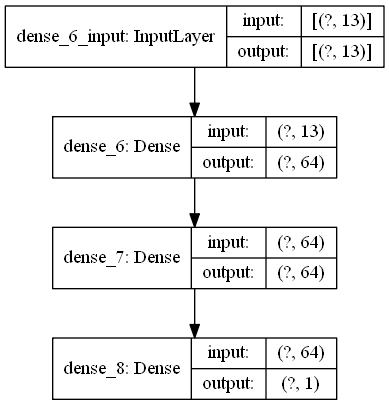

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [29]:
model.save('model-1.h5')